# INVESTIGATION OF TITANIC DATASHEET

RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history.

Here we are going to do analysis of titanic data.

Firstly we need to import all the necessary libraries and the titanic.csv data file into a data frame name as titanic_df.

In [1]:
#importing the neccessary libraries into my jupyter module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#now we should import our file for analysis
titanic_df = pd.read_csv(r'C:\Users\MAVERICK\titanic-data.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


head() function gives the top 5 entries of the data frame. This is used to get an idea of our data and entries in it.

# Fixing Data Types

Before going through the real question for analysis, we should fix all of our data types in a common format so there may not be any problem in accessing the data and performing any operation on it.

In [3]:
titanic_df['Fare']=(titanic_df['Fare']).astype(float)
titanic_df['Age']=titanic_df['Age'].astype(float)
titanic_df['Survived']=titanic_df['Survived'].astype(int)
titanic_df['SibSp']=titanic_df['SibSp'].astype(int)
titanic_df['Parch']=titanic_df['Parch'].astype(int)

In [4]:
#checking for missing data
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

we observe that there are some data missing in our sample, like we don't have age of 177 passengers , cabin details of 687 passengers are also missing and there are 2 embarked entries not available.

# Ques - How many people survived ?

In any accident we firstly check for the survival so our first analysis is to find the count of survivals in our given sample.
We are doing this by taking the 'Survived' column as a numpy series.

In [5]:
survived = titanic_df['Survived'].values    #changing dataframe into a numpy array
print(np.count_nonzero(survived))
survival_percentage = (np.count_nonzero(survived) / titanic_df['PassengerId'].count() ) * 100
survival_percentage

342


38.383838383838381

Here we found that only 342 people survived the accident , out of 891 people so we can say that accident was very much brutal and survival percentage was also low i.e. 38% (approx)

In [6]:
titanic_df['Dead'] =(titanic_df['Survived']== 0).astype(int)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Dead
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


we added a new column 'Dead', which helps us to plot the bar graph for passengers who survived the accident and who didn't.

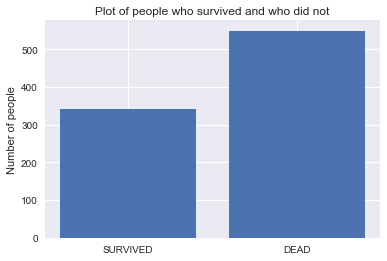

In [7]:
alive=titanic_df['Survived'].sum()
dead=titanic_df['Dead'].sum()

objects = ('SURVIVED', 'DEAD')
y_pos = np.arange(len(objects))
performance = [alive,dead]
 
plt.bar(y_pos, performance, alpha=1 )
plt.xticks(y_pos, objects)
plt.ylabel('Number of people')
plt.title('Plot of people who survived and who did not')
 
plt.show()

### What is the survivability of male and female passengers?

to compute the survivability of male and female passengers we should look for two coulumns , that are 'Survived' and 'Sex'. 

In [8]:
male_alive = 0
female_alive = 0
male_dead = 0
female_dead = 0
sex = pd.Series(titanic_df['Sex'])
survival = pd.Series(titanic_df['Survived'])
survivors = sex[survival == 1]
dead = sex[survival == 0]
for passengers in survivors:
    if passengers == 'male':
        male_alive += 1
    if passengers == 'female':
        female_alive += 1
for passengers in dead:
    if passengers == 'male':
        male_dead += 1
    if passengers == 'female':
        female_dead += 1    

In [9]:
print('There are {} male passengers are alive , while number of dead male passengers are {}. So survivability percentage of male passengers is about {}%'.format(male_alive,male_dead,(male_alive/(male_alive+male_dead))*100))

There are 109 male passengers are alive , while number of dead male passengers are 468. So survivability percentage of male passengers is about 18.890814558058924%


In [10]:
print('There are {} female passengers are alive , while number of dead female passengers are {}. So survivability percentage of female passengers is about {}%'.format(female_alive,female_dead,(female_alive/(female_alive+female_dead))*100))


There are 233 female passengers are alive , while number of dead female passengers are 81. So survivability percentage of female passengers is about 74.20382165605095%


# Ques - What was the distribution of age among passengers ?

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

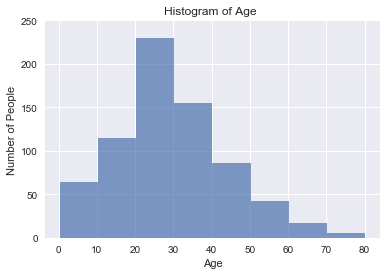

In [11]:
age_plot=titanic_df['Age'].plot(kind='hist',bins=8,alpha=.7)
age_plot.set_xlabel('Age')
age_plot.set_ylabel('Number of People')
age_plot.set_ylim(0,250)
age_plot.set_title('Histogram of Age ')
titanic_df['Age'].describe()

Here we observe two things,


1- total count of passenger is 714 , which means rest entries are missing hence we are doing analysis of 714 passengers.


2- Histogram shows a positive skewness and it is clear that passengers falling in the age group 20-30 are maximun.

# Ques - How the passenger class can be linked with the survival ?

A question comes in our mind that if the survival of passengers was dependent on the class of travel and how it was related. So her we are going to analyse this question.

In [12]:
#calculation of passengers of class1 and their survival
class1 = (titanic_df['Pclass']==1)
class2 = (titanic_df['Pclass']==2)
class3 = (titanic_df['Pclass']==3)
print('Number of passengers in class1 are - {}'.format(np.count_nonzero(class1)))
print('Number of passengers in class1 are - {}'.format(np.count_nonzero(class2)))
print('Number of passengers in class1 are - {}'.format(np.count_nonzero(class3)))

Number of passengers in class1 are - 216
Number of passengers in class1 are - 184
Number of passengers in class1 are - 491


we are defining a function name as survival(), to check the number of people who survived in the given class.

In [13]:
def survival(class_x):
    a = titanic_df['Survived'] + class_x
    return np.sum(a==2)

In [14]:
print('Number of people survived in class1 are - {}'.format(survival(class1)))
print('Percentage of people survived in class1 are - {}%'.format(((survival(class1))/np.count_nonzero(class1))*100))

Number of people survived in class1 are - 136
Percentage of people survived in class1 are - 62.96296296296296%


In [15]:
print('Number of people survived in class1 are - {}'.format(survival(class2)))
print('Percentage of people survived in class1 are - {}%'.format(((survival(class2))/np.count_nonzero(class2))*100))

Number of people survived in class1 are - 87
Percentage of people survived in class1 are - 47.28260869565217%


In [16]:
print('Number of people survived in class1 are - {}'.format(survival(class3)))
print('Percentage of people survived in class1 are - {}%'.format(((survival(class3))/np.count_nonzero(class3))*100))

Number of people survived in class1 are - 119
Percentage of people survived in class1 are - 24.236252545824847%


# FINDINGS

based on above analysis we can draw the following conclusions -

### Possible explanation

### LIMITATIONS

several limitations are there which are as under - 